# Demo Notebook for Proposed Projects for Sentinel Health


Data Flow:

Patient -> DynamoDB -> JSON -> parsed into numpy arrays -> visualization/analysis in python

- Exploration notebook with hypothetical data

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

#### First going to write functions to simulate patient data

- patient_data_generator
- patient_dictionary

In [68]:
# simulating patient data

def patient_data_generator(n, id_):
    """
    function to simulate patient systolic, diastolic, and hr data
    
    inputs
    ------
    n: number of data points (int)
    id_: patient id (str)
    
    outputs
    ------
    pt_dict: nested dictionary
    """
    pt_dict = {}
    
    systolic = np.round(np.random.normal(120, scale=10, size=50 ))
    diastolic = np.round(np.random.normal(80, scale=5, size=50))
    hr = np.round(np.random.normal(65, scale=5, size=50))
    
    pt_dict['Patient ID'] = id_
    pt_dict['Systolic'] = systolic
    pt_dict['Diastolic'] = diastolic
    pt_dict['Heart Rate'] = hr
    
    return pt_dict

In [69]:
patients = patient_data_generator(50, 'A')

In [70]:
patients.keys()

dict_keys(['Patient ID', 'Systolic', 'Diastolic', 'Heart Rate'])

In [71]:
def patient_dictionary(num_patients, n, id_list):
    """
    function for creating dictionary of dictionaries of simulated patient data
    
    inputs
    -------
    num_patients: number of patients to simulate (int)
    n: number of data points (int)
    id_list: list of ids to input (list)
    
    returns
    -------
    master_dict: dictionary with generated patient data
    """
    master_dict = {}
    for i in range(num_patients):
        id_ = id_list[i]
        pt_dict = patient_data_generator(n, id_)
        master_dict[id_] = pt_dict
    return master_dict       

In [73]:
simulated_patients = patient_dictionary(6, 50, ['A', 'B', 'C', 'D', 'E', 'F']) # create dictionary of 5 patients

In [74]:
print(simulated_patients.keys())

simulated_patients['A'].keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F'])


dict_keys(['Patient ID', 'Systolic', 'Diastolic', 'Heart Rate'])

#### edit patient F's data to appear unhealthy

In [85]:
simulated_patients['F']['Systolic'][-5:] = [99, 118, 138, 144, 152]
simulated_patients['F']['Diastolic'][-5:] = [77, 84, 88, 92, 97]

In [87]:
# simulated_patients['F']

#### Have simulated data in simulated_patients dictionary, now going to analyze + visualize

In [88]:
def basic_stats(patient_dict, id_, points_back=0):
    """
    function to get basic stats from patient data
    
    inputs
    -------
    patient_dict: dictionary with patient data (dict)
    id_ : patient id (str)
    points_back: number of data points to look back (int)
    
    returns
    ------
    patient_dict: updated dictionary with basic stats values
    """
    sys_mean = np.mean(patient_dict[id_]['Systolic'][-points_back:])
    sys_std = np.std(patient_dict[id_]['Systolic'][-points_back:])
    
    d_mean = np.mean(patient_dict[id_]['Diastolic'][-points_back:])
    d_std = np.std(patient_dict[id_]['Diastolic'][-points_back:])
    
    hr_mean = np.mean(patient_dict[id_]['Heart Rate'][-points_back:])
    hr_std = np.std(patient_dict[id_]['Heart Rate'][-points_back:])
    
    patient_dict[id_]['Systolic Mean'] = sys_mean
    patient_dict[id_]['Systolic Std'] = sys_std
    patient_dict[id_]['Diastolic Mean'] = d_mean
    patient_dict[id_]['Diastolic Std'] = d_std
    patient_dict[id_]['Heart Rate Mean'] = hr_mean
    patient_dict[id_]['Heart Rate Std'] = hr_std
    
    return patient_dict

In [89]:
# run basic stats on all patients
for key in simulated_patients.keys():
    basic_stats(simulated_patients, key)

#### Visualization

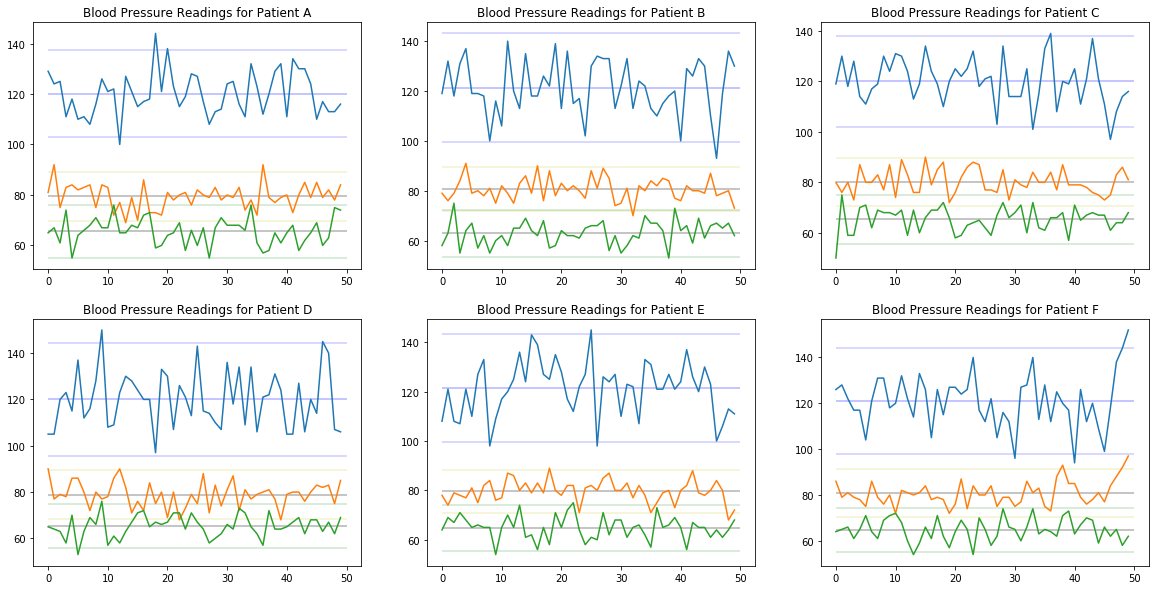

In [106]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

keys = list(simulated_patients.keys())

for i, ax in enumerate(axs.flatten()):
    patient_id = keys[i]
    s_stdev = simulated_patients[patient_id]['Systolic Std']
    d_stdev = simulated_patients[patient_id]['Diastolic Std']
    hr_stdev = simulated_patients[patient_id]['Heart Rate Std']


    
    ax.set_title(f'Blood Pressure Readings for Patient {patient_id}')
    # systolic
    ax.plot(simulated_patients[patient_id]['Systolic'])
    ax.hlines(y = simulated_patients[patient_id]['Systolic Mean'], xmin=0, xmax=50, alpha=0.3, colors='b')
    ax.hlines(y = simulated_patients[patient_id]['Systolic Mean'] + (s_stdev * 2), 
                                                      xmin=0, xmax=50, alpha=0.2, colors='b')
    ax.hlines(y = simulated_patients[patient_id]['Systolic Mean'] - (s_stdev * 2), 
                                                      xmin=0, xmax=50, alpha=0.2, colors='b')
    # diastolic
    ax.plot(simulated_patients[patient_id]['Diastolic'])
    ax.hlines(y = simulated_patients[patient_id]['Diastolic Mean'], xmin=0, xmax=50, alpha=0.3)
    ax.hlines(y = simulated_patients[patient_id]['Diastolic Mean'] + (d_stdev * 2), 
                                                      xmin=0, xmax=50, alpha=0.2, colors='y')
    ax.hlines(y = simulated_patients[patient_id]['Diastolic Mean'] - (d_stdev * 2), 
                                                      xmin=0, xmax=50, alpha=0.2, colors='y')
    #heart rate
    ax.plot(simulated_patients[patient_id]['Heart Rate'])
    ax.hlines(y = simulated_patients[patient_id]['Heart Rate Mean'], xmin=0, xmax=50, alpha=0.3)
    ax.hlines(y = simulated_patients[patient_id]['Heart Rate Mean'] + (hr_stdev * 2), 
                                                      xmin=0, xmax=50, alpha=0.2, colors='g')
    ax.hlines(y = simulated_patients[patient_id]['Heart Rate Mean'] - (hr_stdev * 2), 
                                                      xmin=0, xmax=50, alpha=0.2, colors='g')


- with these visualizations we can see if a patient's vitals exceeds 2 standard deviations.
- can also see when patient's vitals are trending in one direction or the other.


- what you wanted was to calculate the percentage of X readings ago so for patient F we could flag that...

Right now this is a very crude re-creation of the dashboard that you guys have. On your project I could add points for when medications were taken, automate the generation of metric reports for 3-day, 7-day, 3-month, and 6-month metrics in Diastolic/Systolic/HR, create a system to flag patients who's vitals exceed X% in  and build out modeling.